In [ ]:
#multivariate logistic regression
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Libraries: These are collections of pre-written code that provide various functionalities. 
# In your example, pandas, sklearn, matplotlib, and seaborn are the libraries.

# Modules: Within a library, code is organized into modules. Modules are like sub-sections of the library, each focusing on a specific set of tasks. You import modules from a library to access their functionality. For instance:

# sklearn.datasets is a module within the sklearn library that provides sample datasets (like the Iris dataset).
# sklearn.linear_model is a module that provides linear models, including LogisticRegression.
# sklearn.metrics is a module containing functions for evaluating model performance, like accuracy_score, 
# classification_report, and confusion_matrix.
# matplotlib.pyplot is a module that provides a collection of
#  functions that make matplotlib work like MATLAB, providing a convenient way to create plots and visualizations.

#Functions, Classes, and Objects: Within a module, you have:

# Functions: Reusable blocks of code that perform specific tasks (e.g., load_iris, accuracy_score, plt.show).
# Classes: Blueprints for creating objects (e.g., LogisticRegression).
# Objects: Instances of a class (e.g., multi_model = LogisticRegression(...) 
#     creates an object called multi_model that is an instance of the LogisticRegression class).

In [2]:

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal and petal length/width)
y = iris.target  # Target classes (0=setosa, 1=versicolor, 2=virginica)

# Step 2: Multiclass Logistic Regression (using all 3 classes)
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
# This line creates a LogisticRegression model instance for multiclass classification.
# multi_class='multinomial' specifies that we're using the multinomial logistic regression, which can handle more than two classes directly.

# The solver parameter in LogisticRegression specifies the optimization algorithm used to find the coefficients that
#  minimize the cost function of the logistic regression model.
#  In simpler terms, it's the method the model uses to learn the best way to separate the different classes in your data. 

# max_iter=200 sets the maximum number of iterations for the solver to converge.

multi_model.fit(X, y)

#This line trains the multi_model using the features X (sepal and petal measurements) 
# and the target classes y (iris species). The model learns the relationship between the features and the classes.
y_pred_multi = multi_model.predict(X)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Multiclass Logistic Regression ===
Accuracy: 97.33%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



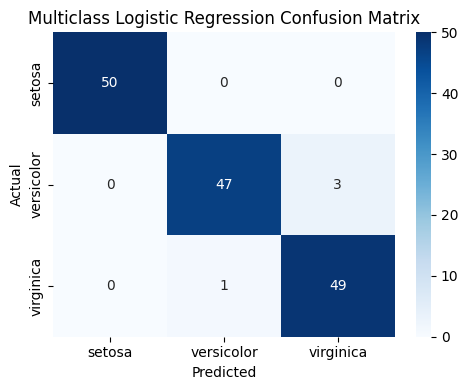

In [3]:

# Step 3: Evaluate Multiclass Model
print("=== Multiclass Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y, y_pred_multi) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y, y_pred_multi, target_names=iris.target_names))

# Step 4: Visualize Confusion Matrix
cm_multi = confusion_matrix(y, y_pred_multi)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_multi, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

# cmap='Blues' sets the color scheme to a blue gradient.
# fmt='d' formats the annotations as integers

plt.title("Multiclass Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

#Adjusts the plot layout to prevent labels from overlapping.

plt.savefig("iris_multiclass_confusion.png")
plt.show()


In [4]:

# Step 5: Binary Logistic Regression (only class 0 vs 1)
# Filter only setosa and versicolor
binary_filter = y < 2
X_binary = X[binary_filter]
y_binary = y[binary_filter]

# binary_filter = y < 2:
# Creates a boolean mask binary_filter that is True for the first two classes (0 and 1, setosa and versicolor) and False for the rest.

# X_binary = X[binary_filter]:
# Filters the feature data X to include only the samples where binary_filter is True. 
# This creates a new feature matrix X_binary containing only data for setosa and versicolor.

# y_binary = y[binary_filter]:
# Filters the target data y to include only the classes where binary_filter is True.
# This creates a new target vector y_binary containing only labels for setosa and versicolor.
    
binary_model = LogisticRegression(solver='lbfgs')
binary_model.fit(X_binary, y_binary)
y_pred_binary = binary_model.predict(X_binary)



=== Binary Logistic Regression (Setosa vs Versicolor) ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



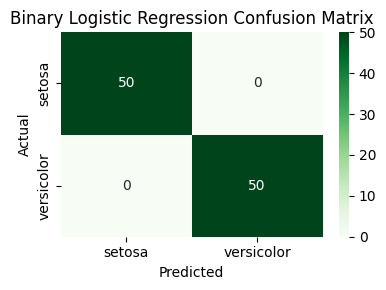

In [5]:

# Step 6: Evaluate Binary Model
print("\n=== Binary Logistic Regression (Setosa vs Versicolor) ===")
print(f"Accuracy: {accuracy_score(y_binary, y_pred_binary) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_binary, y_pred_binary, target_names=iris.target_names[:2]))

# Step 7: Binary Confusion Matrix
cm_binary = confusion_matrix(y_binary, y_pred_binary)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_binary, annot=True, cmap='Greens', fmt='d',
            xticklabels=iris.target_names[:2],
            yticklabels=iris.target_names[:2])
plt.title("Binary Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("iris_binary_confusion.png")
plt.show()
